# Sentiment Analysis and Prediction of Review Ratings on the Yelp Reviews Dataset using various Machine Learning Algorithms
Dataset Information: <br>
(1). Dataset:
*   Column 1 - Unique Business ID
*   Column 2 - Date of Review
*   Column 3 - Review ID
*   Column 4 - Stars given by the user
*   Column 5 - Review given by the user
*   Column 6 - Type of text entered - Review
*   Column 7 - Unique User ID
*   Column 8 - Cool column: The number of cool votes the review received
*   Column 9 - Useful column: The number of useful votes the review received
*   Column 10 - Funny Column: The number of funny votes the review received 
<br>Number of entries - 10000

**(1). Importing all the necessary modules:**

In [1]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import math
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

**(2). Loading and seeing the dataset details:**

In [2]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('yelp.csv')

In [3]:
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)

Shape of the dataset:
(10000, 10)


In [4]:
# COLUMN NAMES
print("Column names:")
print(data.columns)

Column names:
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


In [5]:
# DATATYPE OF EACH COLUMN
print("Datatype of each column:")
print(data.dtypes)

Datatype of each column:
business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object


In [6]:
# SEEING FEW OF THE ENTRIES
print("Few dataset entries:")
print(data.head())

Few dataset entries:
              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  26-01-2011  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  27-07-2011  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  14-06-2012  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  27-05-2010  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  05-01-2012  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiob

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [8]:
data.clip()

business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  26-01-2011  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  27-07-2011  IjZ33sJrzXqU-0X6U8NwyA      5   
2     6oRAC4uyJCsJl1X0WZpVSA  14-06-2012  IESLBzqUCLdSzSqm0eCSxQ      4   
3     _1QQZuf4zZOyFCvXc0o6Vg  27-05-2010  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  05-01-2012  1uJFq2r5QfJG_6ExMRCaGw      5   
...                      ...         ...                     ...    ...   
9995  VY_tvNUCCXGXQeSvJl757Q  28-07-2012  Ubyfp2RSDYW0g7Mbr8N3iA      3   
9996  EKzMHI1tip8rC1-ZAy64yg  18-01-2012  2XyIOQKbVFb6uXQdJ0RzlQ      4   
9997  53YGfwmbW73JhFiemNeyzQ  16-11-2010  jyznYkIbpqVmlsZxSDSypA      4   
9998  9SKdOoDHcFoxK5ZtsgHJoA  02-12-2012  5UKq9WQE1qQbJ0DJbc-B6Q      2   
9999  pF7uRzygyZsltbmVpjIyvw  16-10-2010  vWSmOhg2ID1MNZHaWapGbA      5   

                                                   text    type  \
0     My wife took me here on my birthday for breakf...  review   
1     I have no idea why some people give bad review...  review   
2     love the gyro plate. Rice is so good and I als...  review   
3     Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4     General Manager Scott Petello is a good egg!!!...  review   
...                                                 ...     ...   
9995  First visit...Had lunch here today - used my G...  review   
9996  Should be called house of deliciousness!\n\nI ...  review   
9997  I recently visited Olive and Ivy for business ...  review   
9998  My nephew just moved to Scottsdale recently so...  review   
9999  4-5 locations.. all 4.5 star average.. I think...  review   

                     user_id  cool  useful  funny  
0     rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1     0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2     0hT2KtfLiobPvh6cDC8JQg     0       1      0  
3     uZetl9T0NcROGOyFfughhg     1       2      0  
4     vYmM4KTsC8ZfQBg-j5MWkw     0       0      0  
...                      ...   ...     ...    ...  
9995  _eqQoPtQ3e3UxLE4faT6ow     1       2      0  
9996  ROru4uk5SaYc3rg8IU7SQw     0       0      0  
9997  gGbN1aKQHMgfQZkqlsuwzg     0       0      0  
9998  0lyVoNazXa20WzUyZPLaQQ     0       0      0  
9999  KSBFytcdjPKZgXKQnYQdkA     0       0      0  

[10000 rows x 10 columns]

In [9]:
data.isnull()

business_id   date  review_id  stars   text   type  user_id   cool  \
0           False  False      False  False  False  False    False  False   
1           False  False      False  False  False  False    False  False   
2           False  False      False  False  False  False    False  False   
3           False  False      False  False  False  False    False  False   
4           False  False      False  False  False  False    False  False   
...           ...    ...        ...    ...    ...    ...      ...    ...   
9995        False  False      False  False  False  False    False  False   
9996        False  False      False  False  False  False    False  False   
9997        False  False      False  False  False  False    False  False   
9998        False  False      False  False  False  False    False  False   
9999        False  False      False  False  False  False    False  False   

      useful  funny  
0      False  False  
1      False  False  
2      False  False  
3      False  False  
4      False  False  
...      ...    ...  
9995   False  False  
9996   False  False  
9997   False  False  
9998   False  False  
9999   False  False  

[10000 rows x 10 columns]

In [10]:
data.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [11]:
# DATASET SUMMARY
data.describe(include='all')

business_id        date review_id         stars           text    type  \
count        10000       10000     10000  10000.000000          10000   10000   
unique        4117        1995      9852           NaN           9998       1   
top         #NAME?  28-03-2011    #NAME?           NaN  Great service  review   
freq           176          21       149           NaN              2   10000   
mean           NaN         NaN       NaN      3.777500            NaN     NaN   
std            NaN         NaN       NaN      1.214636            NaN     NaN   
min            NaN         NaN       NaN      1.000000            NaN     NaN   
25%            NaN         NaN       NaN      3.000000            NaN     NaN   
50%            NaN         NaN       NaN      4.000000            NaN     NaN   
75%            NaN         NaN       NaN      5.000000            NaN     NaN   
max            NaN         NaN       NaN      5.000000            NaN     NaN   

       user_id          cool        useful         funny  
count    10000  10000.000000  10000.000000  10000.000000  
unique    6325           NaN           NaN           NaN  
top     #NAME?           NaN           NaN           NaN  
freq       121           NaN           NaN           NaN  
mean       NaN      0.876800      1.409300      0.701300  
std        NaN      2.067861      2.336647      1.907942  
min        NaN      0.000000      0.000000      0.000000  
25%        NaN      0.000000      0.000000      0.000000  
50%        NaN      0.000000      1.000000      0.000000  
75%        NaN      1.000000      2.000000      1.000000  
max        NaN     77.000000     76.000000     57.000000

**(3). Creating of a new column:**<br>
The new column will be - "length". This column will hold the data of the word length of the review.

In [12]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
data['length'] = data['text'].apply(len)
data.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  26-01-2011  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  27-07-2011  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  14-06-2012  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  27-05-2010  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  05-01-2012  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  length  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0     889  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0    1345  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0      76  
3  uZetl9T0NcROGOyFfughhg     1       2      0     419  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0     469

**(4). Visualization:**<br>
Let us now visualize the if there is any correlation between stars and the length of the review.

C:\Users\dp280\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


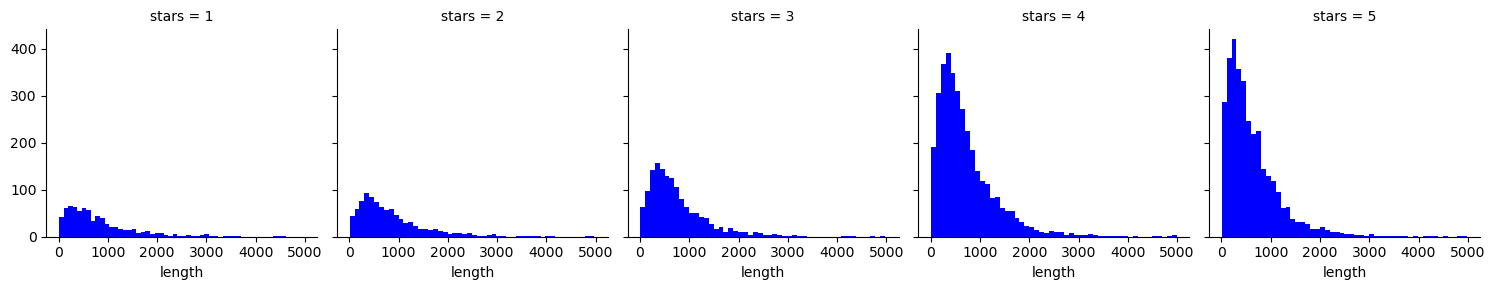

In [13]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

C:\Users\dp280\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


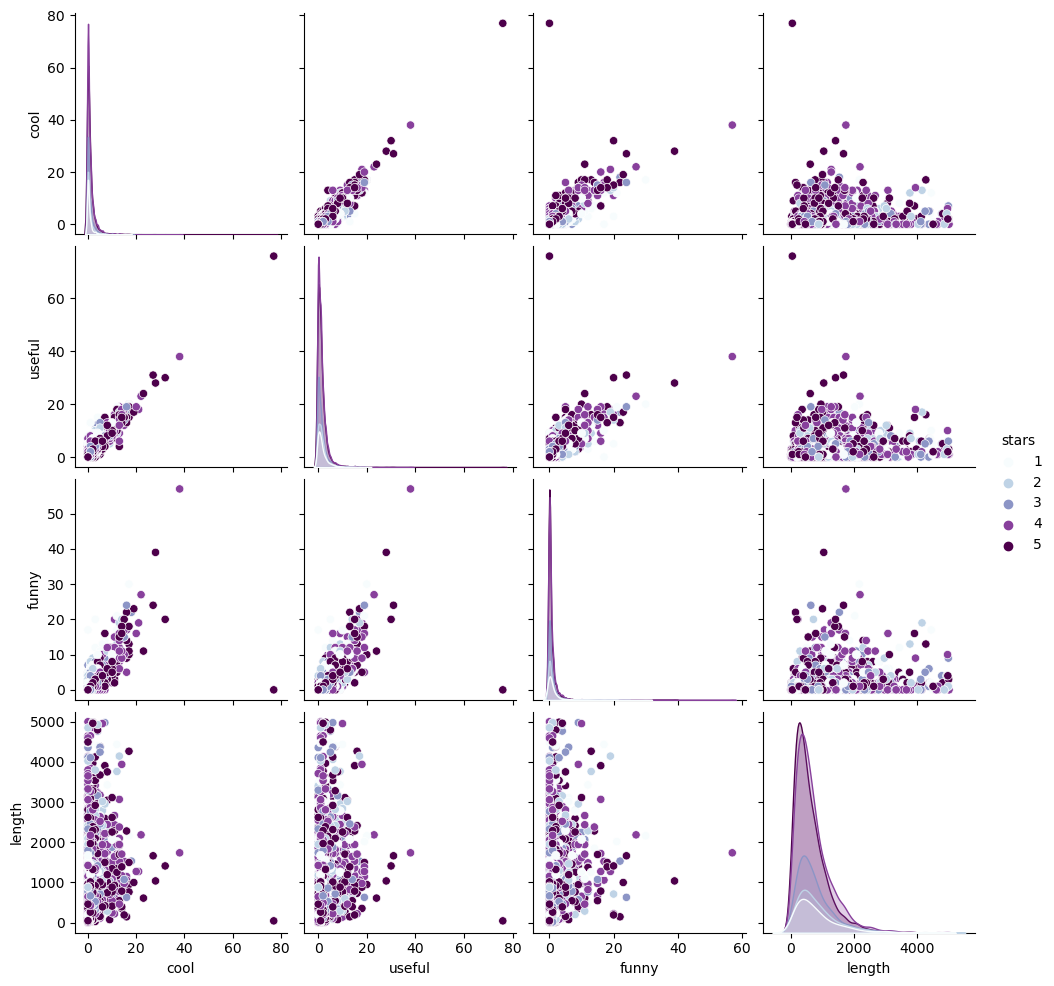

In [14]:
sns.pairplot(data, hue='stars', palette='BuPu')

**(5). Mean Value of the Vote columns**
There are 3 voting columns for the reviews - funny, cool and useful. Let us now find the mean values with respect to the stars given to the review.

In [15]:
# Group by 'stars' column and calculate the mean of 'cool', 'useful', and 'funny' columns
stval = data.groupby('stars')[['cool', 'useful', 'funny','length']].mean()
print(stval)

           cool    useful     funny      length
stars                                          
1      0.576769  1.604806  1.056075  826.515354
2      0.719525  1.563107  0.875944  842.256742
3      0.788501  1.306639  0.694730  758.498289
4      0.954623  1.395916  0.670448  712.923142
5      0.944261  1.381780  0.608631  624.999101


**(6). Correlation between the voting columns:** <br>
Let us now see what the correlation is between the three voting columns.

In [16]:
# FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS
stval.corr()

cool    useful     funny    length
cool    1.000000 -0.743329 -0.944939 -0.857664
useful -0.743329  1.000000  0.894506  0.699881
funny  -0.944939  0.894506  1.000000  0.843461
length -0.857664  0.699881  0.843461  1.000000

In [17]:
stval.columns

Index(['cool', 'useful', 'funny', 'length'], dtype='object')

Text(0.5, 1.0, 'Heatmap of Variables')

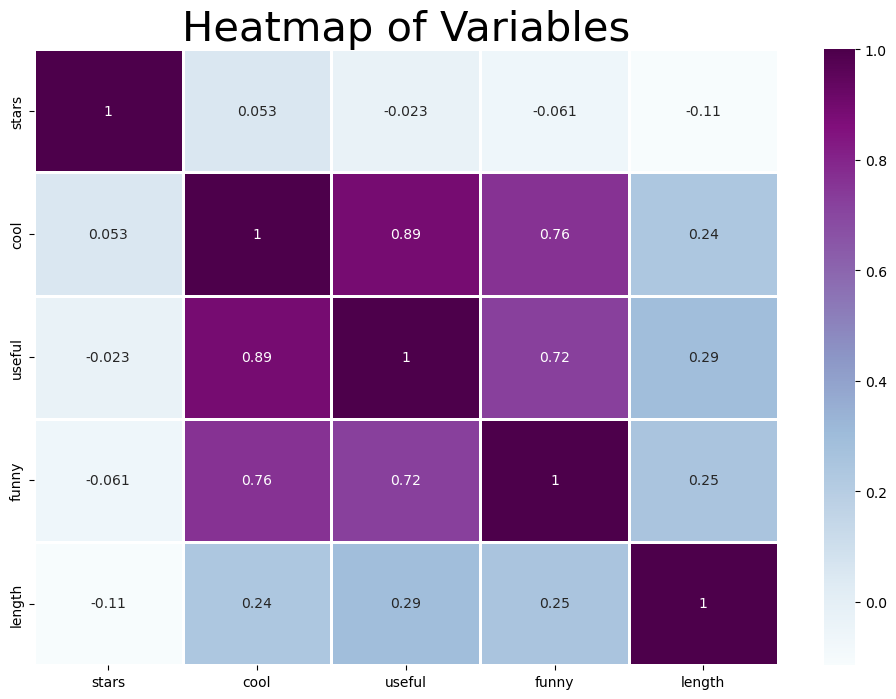

In [18]:
yelp_cor = data[['stars', 'cool', 'useful', 'funny', 'length']].corr()

fig = plt.figure(figsize=(12,8))
axes = sns.heatmap(yelp_cor, cmap='BuPu', linewidth=1, linecolor='white', annot=True)
axes.set_title('Heatmap of Variables', fontsize=30)

Thus, we can see that there is negative correlation between:
    * Cool and Useful
    * Cool and Funny
    * Cool and Length  <br>
Thus, we can say that the reviews marked cool tend to be curt, not very useful to others and short.<br>
Whereas, there is a positive correlation between:
    * Funny and Useful    
    * Funny and Length
    * Useful and Length    
Thus, we can say that longer reviews tend to be funny and useful.

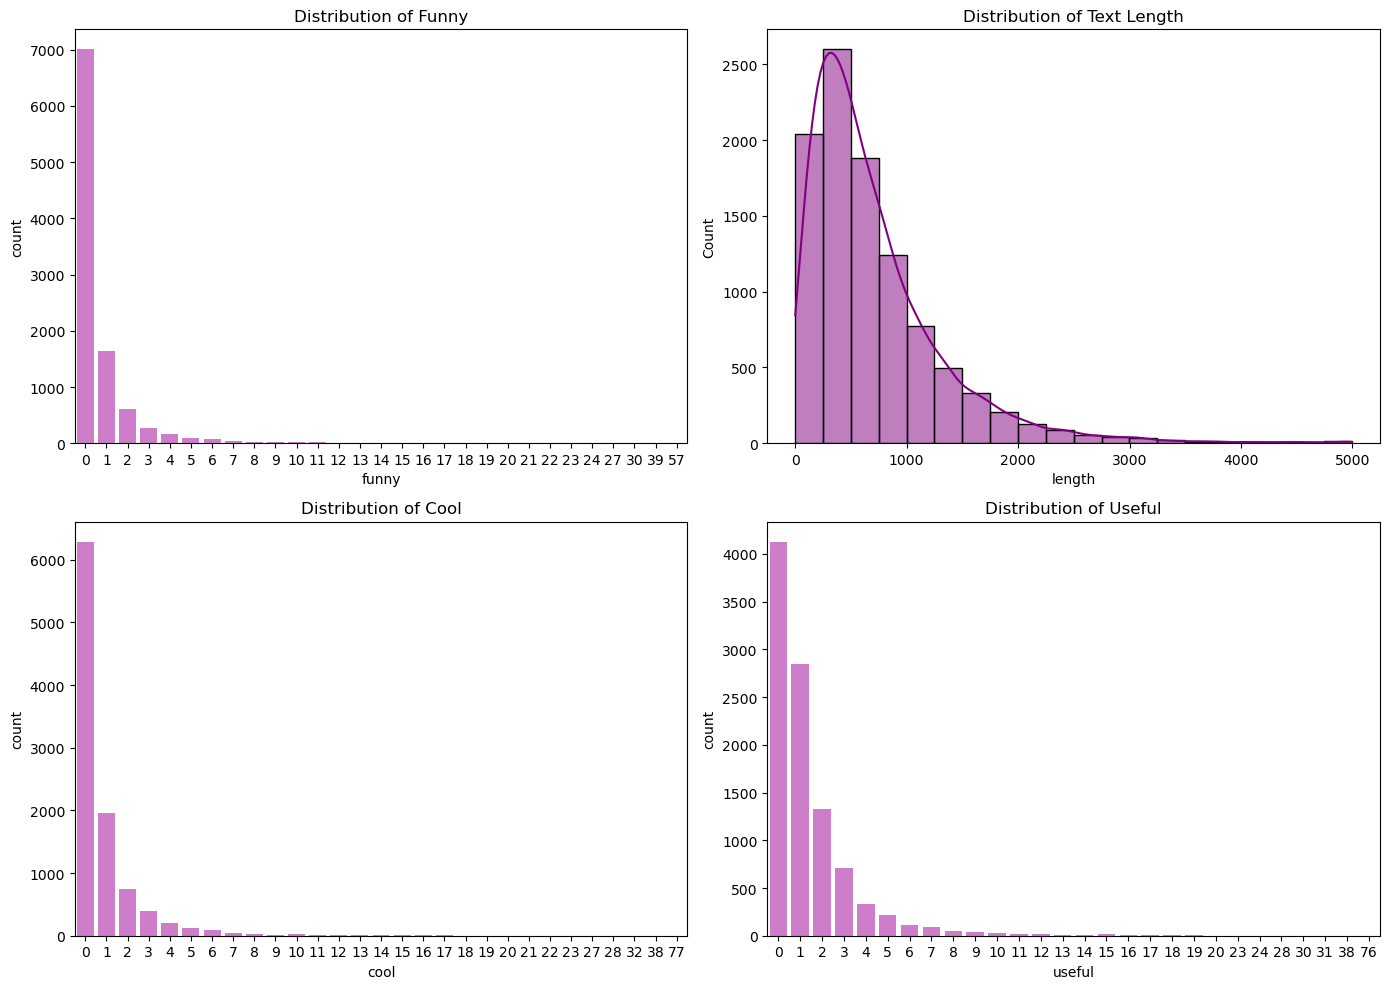

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot countplot for Funny
sns.countplot(x=data['funny'], color='orchid', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Funny')

# Plot distribution of Text Length
sns.histplot(x=data['length'], bins=20, kde=True, color='purple', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Text Length')

# Plot countplot for Cool
sns.countplot(x=data['cool'],color='orchid', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Cool')

# Plot countplot for Useful
sns.countplot(x=data['useful'],color='orchid', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Useful')

plt.tight_layout()
plt.show()



Text(0, 0.5, 'Count')

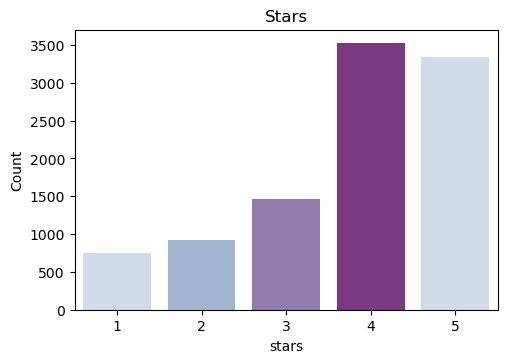

In [20]:
warnings.filterwarnings("ignore")

custom_palette = sns.color_palette("BuPu", 4)
fig = plt.figure(figsize=(12, 8))
axes1 = plt.subplot(2, 2, 1)
axes1 = sns.countplot(x='stars', data=data, palette=custom_palette)
axes1.set_title('Stars')
axes1.set_ylabel('Count')


<Axes: xlabel='stars', ylabel='length'>

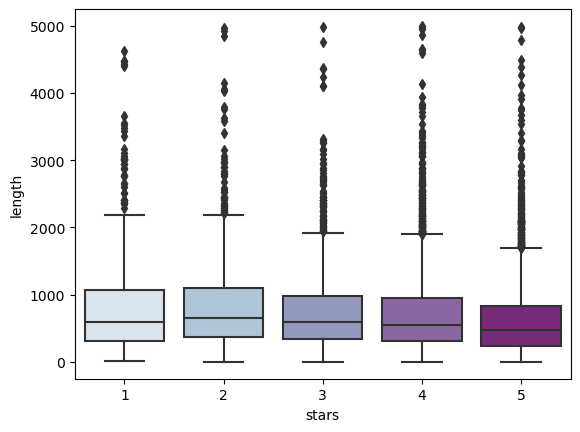

In [21]:
warnings.filterwarnings("ignore")
sns.boxplot(x='stars', y='length', data=data, palette='BuPu')

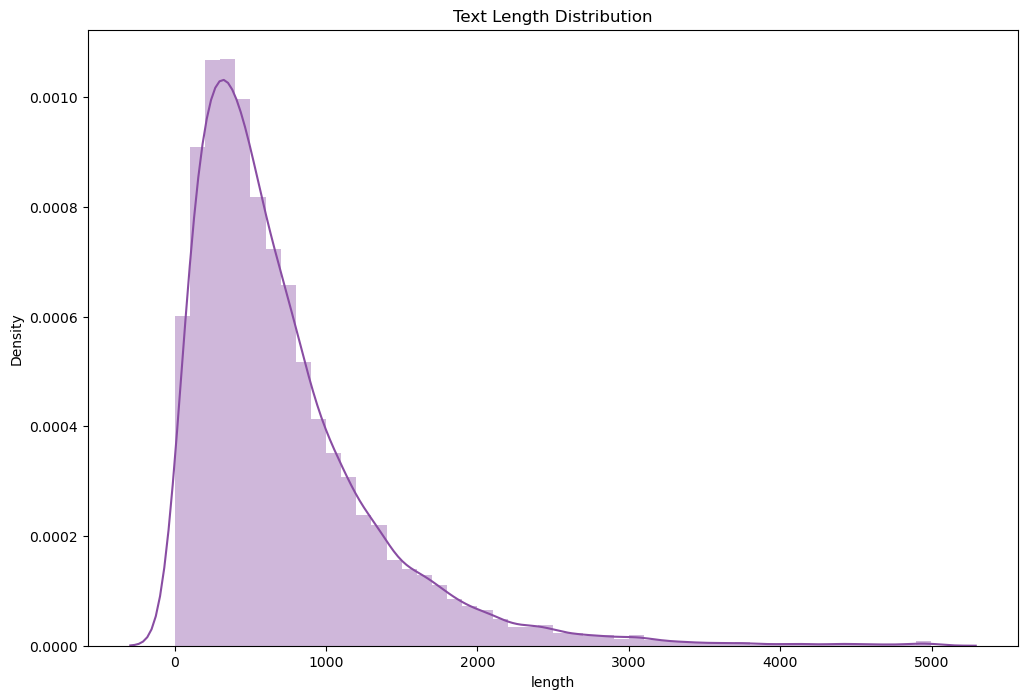

In [22]:
import warnings
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(12,8))
sns.distplot(data['length'], kde=True, bins=50, color=sns.color_palette("BuPu")[4])
plt.title('Text Length Distribution')
plt.show()

**(7). Classifying the dataset and splitting it into the reviews and stars:**

In [23]:
# CLASSIFICATION
data_classes = data[(data['stars']==1) | (data['stars']==3) | (data['stars']==5)]
data_classes.head()
print(data_classes.shape)

# Seperate the dataset into X and Y for prediction
x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

(5547, 11)
0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


**(8). Data Cleaning:** <br>
We will now, define a function which will clean the dataset by removing stopwords and punctuations.

In [24]:
# CLEANING THE REVIEWS - REMOVAL OF STOPWORDS AND PUNCTUATION
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

**(9). Vectorization**<br>
We will now vectorize a single review and see the results:

In [25]:
# CONVERTING THE WORDS INTO A VECTOR
vocab = CountVectorizer(analyzer=text_process).fit(x)
print(len(vocab.vocabulary_))
r0 = x[0]
print(r0)
vocab0 = vocab.transform([r0])
print(vocab0)
"""
    Now the words in the review number 78 have been converted into a vector.
    The data that we can see is the transformed words.
    If we now get the feature's name - we can get the word back!
"""
print("Getting the words back:")
print(vocab.get_feature_names_out()[19648])
print(vocab.get_feature_names_out()[10643])

31336
My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
  (0, 292)	1
  (0, 1213)	1
  (0, 1811)	1
  (0, 3537)	1
  (0, 5139)	1
  (0, 5256)	2
  (0, 6275)	1
  (0, 8

**(10). Vectorization of the whole review set and and checking the sparse matrix:**

In [26]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (5547, 31336)
Non-Zero occurences:  312457
Density of the matrix =  0.17975812697942373


**(11). Splitting the dataset X into training and testing set:**

In [27]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

**(12). Modelling:**<br>

In [28]:
# MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[ 90  38  34]
 [ 21 187  84]
 [ 15  58 583]]
Score: 77.48
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.56      0.63       162
           3       0.66      0.64      0.65       292
           5       0.83      0.89      0.86       656

    accuracy                           0.77      1110
   macro avg       0.74      0.69      0.71      1110
weighted avg       0.77      0.77      0.77      1110



From the above algorithm modelling, we can see that: 
* Multilayer Perceptron = 77.57%

Since multilayer perceptron classifier has the best score, let us use it to predict a random positive review, a random average review and a random negative review!

In [29]:
# POSITIVE REVIEW
pr = data['text'][0]
print(pr)
print("Actual Rating: ",data['stars'][0])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mlp.predict(pr_t)[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
Actual Rating:  5
Predicted Rating:


5

In [30]:
# AVERAGE REVIEW
ar = data['text'][16]
print(ar)
print("Actual Rating: ",data['stars'][16])
ar_t = vocab.transform([ar])
print("Predicted Rating:")
mlp.predict(ar_t)[0]

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

3

In [31]:
# NEGATIVE REVIEW
nr = data['text'][16]
print(nr)
print("Actual Rating: ",data['stars'][23])
nr_t = vocab.transform([nr])
print("Predicted Rating:")
mlp.predict(nr_t)[0]

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

3

In [32]:
count = data['stars'].value_counts()
print(count)

stars
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64


From the above, we can see that predictions are biased towards positive reviews. We can see that the dataset has more positive reviews as compared to negative reviews. <br>
I think I can fix it by normalizing the dataset to have equal number of reviews - thereby removing the bias. 

Text Analysis
For text analysis, we need to remove all punctuations and stopwords. Then we can get word frequency and make some preparations for further building up model.

In [33]:
yelp_text = data[['stars', 'text']]
yelp_text.head()

stars                                               text
0      5  My wife took me here on my birthday for breakf...
1      5  I have no idea why some people give bad review...
2      4  love the gyro plate. Rice is so good and I als...
3      5  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4      5  General Manager Scott Petello is a good egg!!!...

In [34]:
def remove_punc_stopword(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [35]:
yelp_text_allstars = yelp_text.copy()
yelp_text_allstars['text'] = yelp_text_allstars['text'].apply(remove_punc_stopword)
yelp_text_allstars.count()

stars    10000
text     10000
dtype: int64

In [36]:
yelp_text_allstars.head()

stars                                               text
0      5  [wife, took, birthday, breakfast, excellent, w...
1      5  [idea, people, give, bad, reviews, place, goes...
2      4  [love, gyro, plate, rice, good, also, dig, can...
3      5  [rosie, dakota, love, chaparral, dog, park, co...
4      5  [general, manager, scott, petello, good, egg, ...

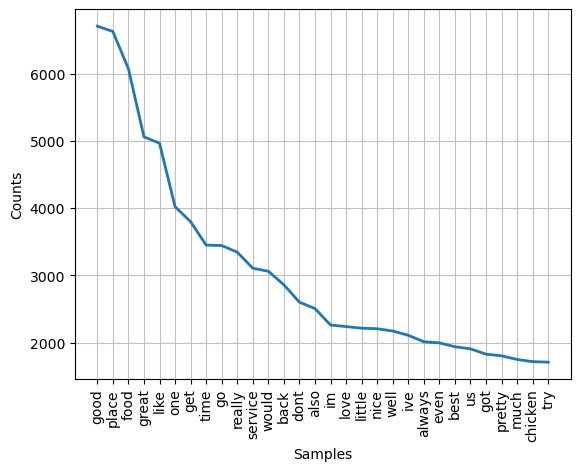

<Axes: xlabel='Samples', ylabel='Counts'>

In [37]:
from nltk import FreqDist
words_split = []
for i in range(0,9999): 
    for word in yelp_text_allstars['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

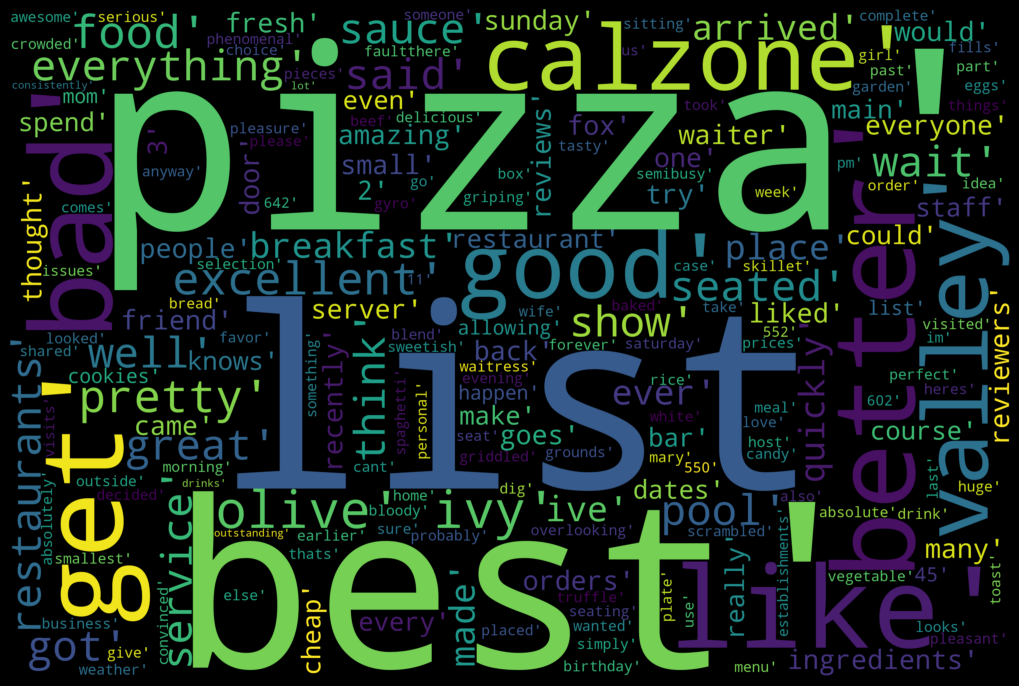

In [38]:
from wordcloud import WordCloud, STOPWORDS
yelp_allstars_text = yelp_text_allstars['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_allstars_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [39]:
import warnings
warnings.filterwarnings("ignore")
yelp_text_stars1 = yelp_text[yelp_text['stars']==1]
yelp_text_stars1['text'] = yelp_text_stars1['text'].apply(remove_punc_stopword)
yelp_text_stars1.count()

stars    749
text     749
dtype: int64

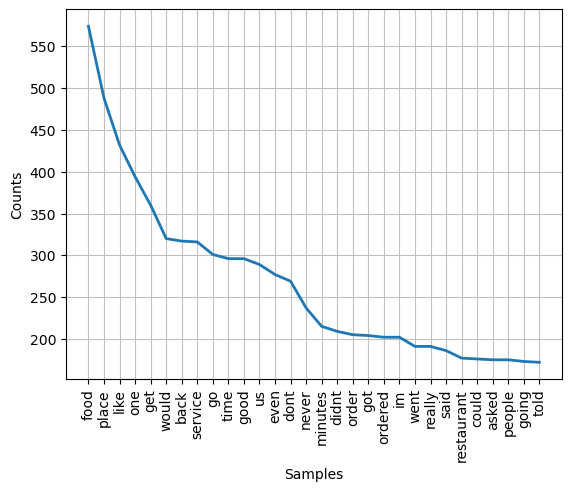

<Axes: xlabel='Samples', ylabel='Counts'>

In [40]:
yelp_text_stars1 = yelp_text_stars1.reset_index(drop=True)
words_split = []
for i in range(0,749): 
    for word in yelp_text_stars1['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

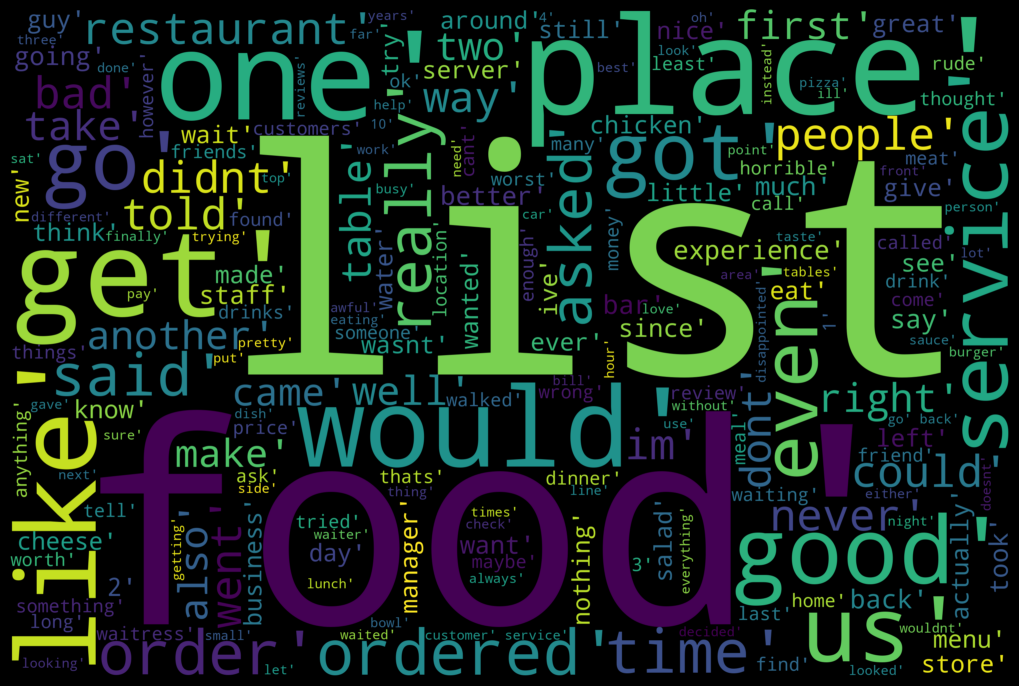

In [41]:
yelp_stars1_text = yelp_text_stars1['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_stars1_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [42]:
import warnings
warnings.filterwarnings("ignore")
yelp_text_stars5 = yelp_text[yelp_text['stars']==5]
yelp_text_stars5['text'] = yelp_text_stars5['text'].apply(remove_punc_stopword)
yelp_text_stars5.count()

stars    3337
text     3337
dtype: int64

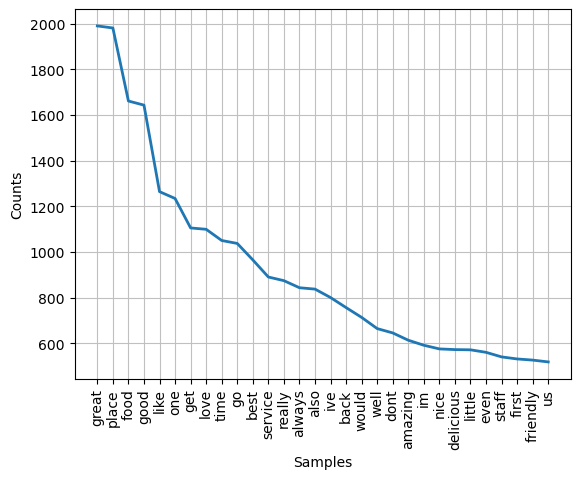

<Axes: xlabel='Samples', ylabel='Counts'>

In [43]:
yelp_text_stars5 = yelp_text_stars5.reset_index(drop=True)
words_split = []
for i in range(0,3337): 
    for word in yelp_text_stars5['text'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

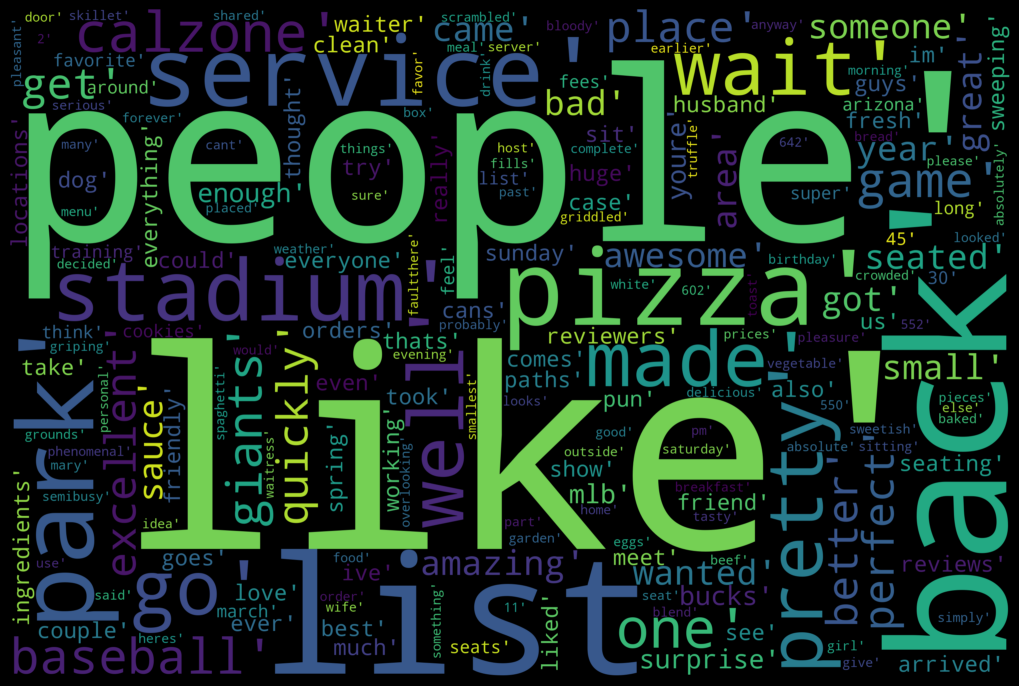

In [44]:
yelp_stars5_text = yelp_text_stars5['text'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(yelp_stars5_text))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [45]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Define a function to classify the sentiment of a review
def classify_sentiment(review):
    scores = sid.polarity_scores(review)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'  # You can adjust this threshold according to your preference

# Apply sentiment analysis and classify each review
data['sentiment'] = data['text'].apply(classify_sentiment)

# Separate positive and negative reviews
positive_reviews = data[data['sentiment'] == 'positive']
negative_reviews = data[data['sentiment'] == 'negative']

# Print some statistics
print("Total reviews:", len(data))
print("Positive reviews:", len(positive_reviews))
print("Negative reviews:", len(negative_reviews))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dp280\AppData\Roaming\nltk_data...


Total reviews: 10000
Positive reviews: 8921
Negative reviews: 952


In [46]:
import plotly.graph_objects as go

# Data
labels = ['Positive', 'Negative']
sizes = [len(positive_reviews), len(negative_reviews)]
colors = ['#66c2a5', '#fc8d62']  # Soft pastel colors

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.4, marker=dict(colors=colors))])

# Update layout
fig.update_layout(
    title='Distribution of Yelp Reviews',
    title_font_size=20,
    font=dict(size=14),
)

# Show plot
fig.show()
